In [211]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


'pip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'pip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'pip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'pip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'pip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [212]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import joblib



In [213]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


'pip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [249]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [250]:
#visualizando os tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [214]:
#visualizando a quantidade de linhas e colunas
df.shape

(150, 5)

In [216]:
#visualizando as estatisticas descritivas do dataset
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


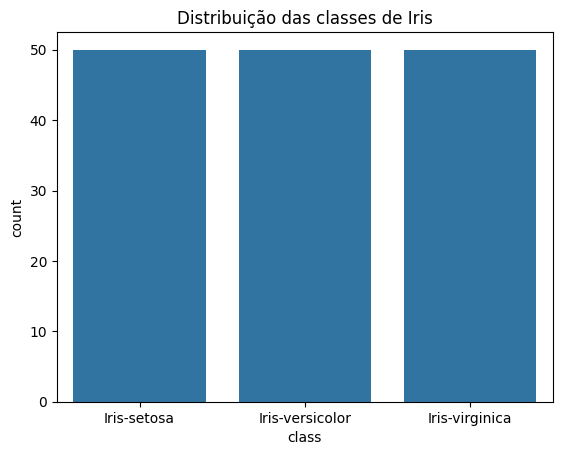

In [217]:
#visualizando a distribuicao das classes
sns.countplot(data=df, x='class')
plt.title('Distribuição das classes de Iris')
plt.savefig('distribuicao_classes.png')
plt.show()

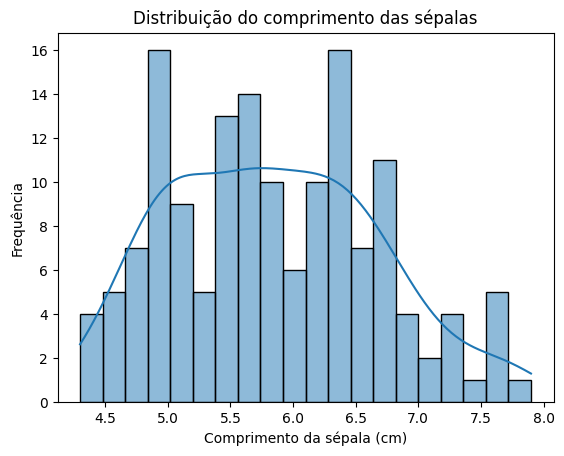

<Figure size 640x480 with 0 Axes>

In [218]:
#visualizando a distribuicao do comprimento das sepalas
sns.histplot(data=df, x='sepal length',bins=20, kde=True)
plt.title('Distribuição do comprimento das sépalas')
plt.xlabel('Comprimento da sépala (cm)')
plt.ylabel('Frequência')
plt.show()
plt.savefig('distribuicao_sepal_length.png')

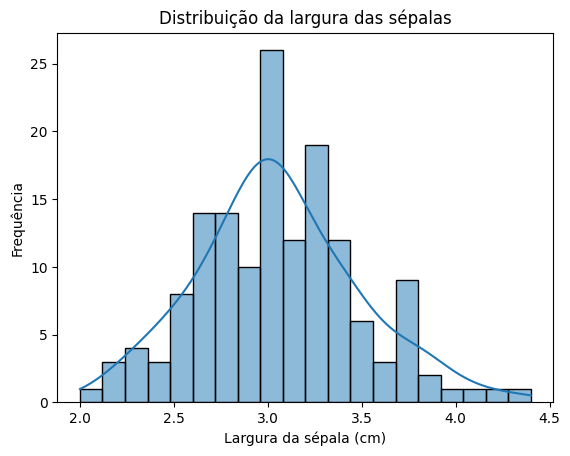

<Figure size 640x480 with 0 Axes>

In [219]:
#visualizando a distribuicao da largura das sepalas
sns.histplot(data=df, x='sepal width', bins=20, kde=True)
plt.title('Distribuição da largura das sépalas')
plt.xlabel('Largura da sépala (cm)')
plt.ylabel('Frequência')
plt.show()
plt.savefig('distribuicao_sepal_width.png')


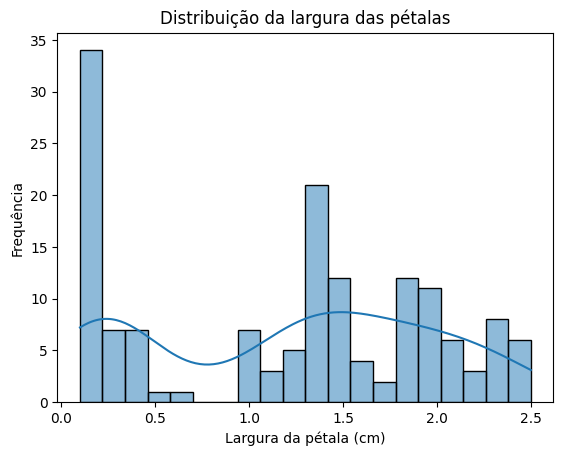

<Figure size 640x480 with 0 Axes>

In [220]:
#visualizando a distribuicao do comprimento das petalas
sns.histplot(data=df, x='petal width', bins=20, kde=True)
plt.title('Distribuição da largura das pétalas')
plt.xlabel('Largura da pétala (cm)')
plt.ylabel('Frequência')
plt.show()
plt.savefig('distribuicao_petal_width.png')


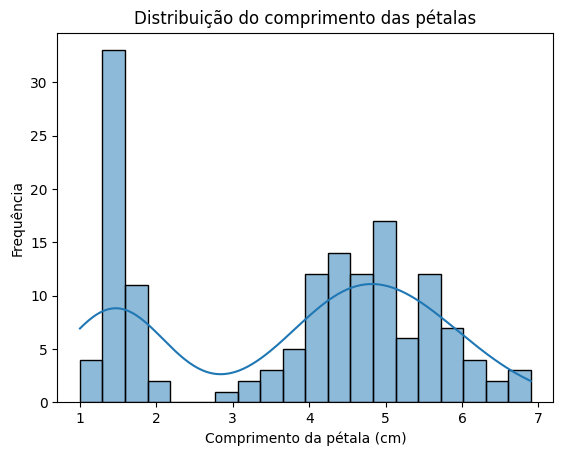

<Figure size 640x480 with 0 Axes>

In [221]:
#visualizando a distribuicao do comprimento das petalas
sns.histplot(data=df, x='petal length', bins=20, kde=True)
plt.title('Distribuição do comprimento das pétalas')
plt.xlabel('Comprimento da pétala (cm)')
plt.ylabel('Frequência')
plt.show()
plt.savefig('distribuicao_petal_length.png')

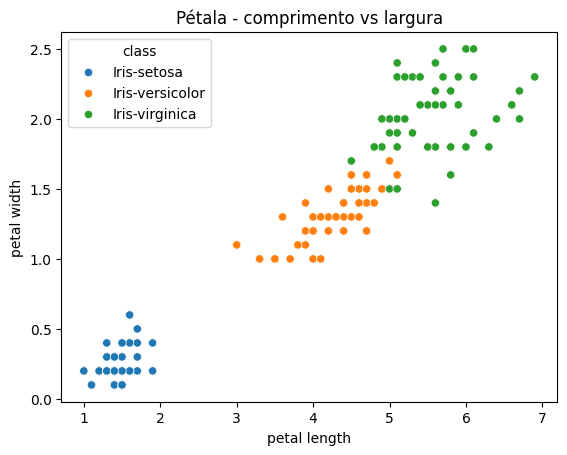

In [222]:
#visualizando a relação entre comprimento e largura da petala
sns.scatterplot(data=df, x='petal length', y='petal width', hue='class')
plt.title('Pétala - comprimento vs largura')
plt.savefig('petala_comprimento_largura.png')
plt.show()

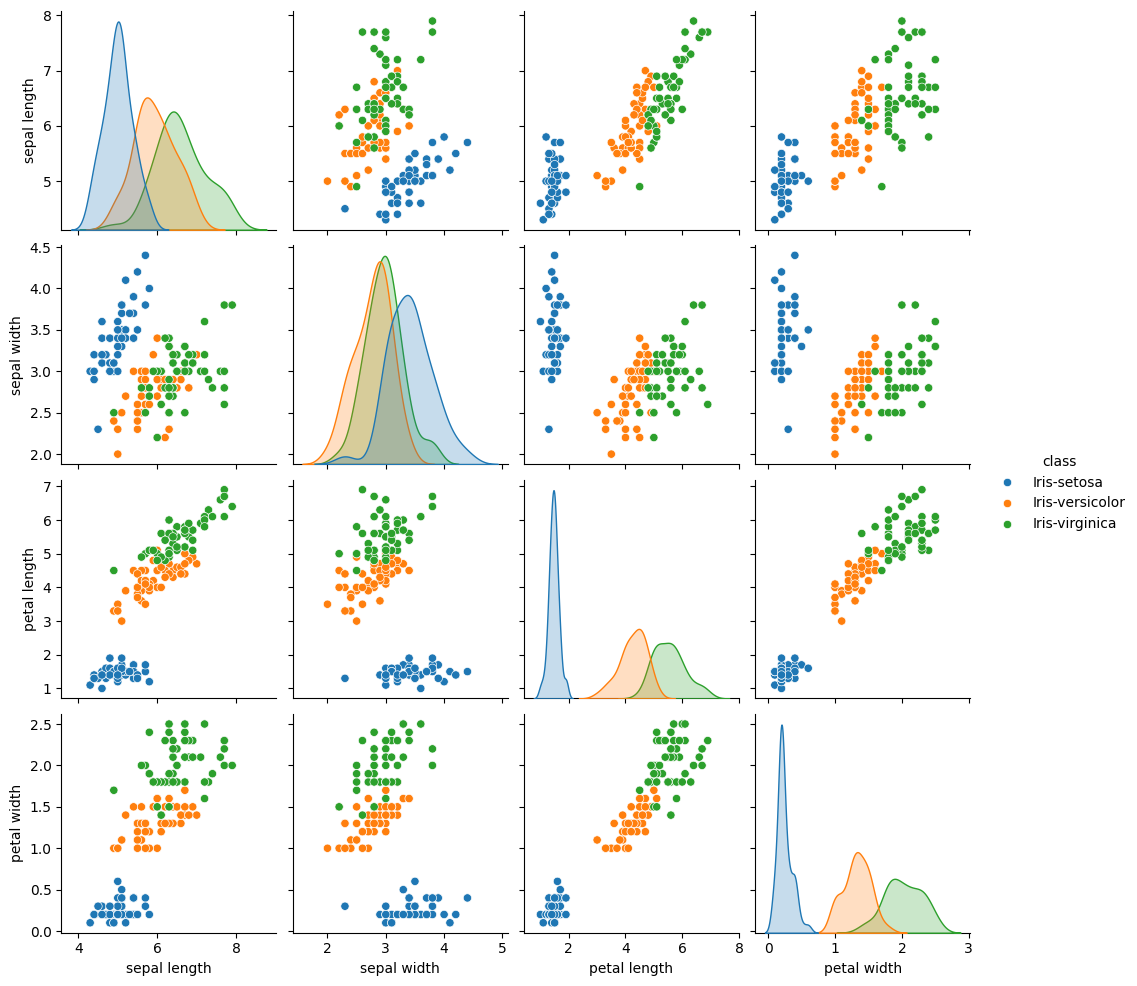

In [223]:
#visualizando a relação entre todas as variáveis
sns.pairplot(df, hue='class')
plt.savefig('pairplot_iris.png')
plt.show()

In [224]:
#dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
#Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


c:\Users\biady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [226]:
#Fazer previsões com o modelo KNN
y_pred_knn = knn.predict(X_test)
y_pred_knn

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [227]:
#Avaliar o modelo KNN
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
accuracy_knn

1.0

In [228]:
#Salvar o modelo KNN treinado em um arquivo
joblib.dump(knn, 'knn_iris_model.pkl')

['knn_iris_model.pkl']

In [229]:
#Fazer uma previsão com o modelo KNN salvo
teste = [[5.1, 3.5, 1.4, 0.2]]
knn.predict(teste)

c:\Users\biady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [230]:
#Criar e treinar o modelo Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [231]:
#Fazer previsões com o modelo Decision Tree
y_pred_dt = dt.predict(X_test)
y_pred_dt

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [232]:
#Avaliar o modelo Decision Tree
accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
accuracy_dt

1.0

In [233]:
#Salvar o modelo Decision Tree treinado em um arquivo
joblib.dump(dt, 'decision_tree_iris_model.pkl') 


['decision_tree_iris_model.pkl']

In [234]:
#Fazer uma previsão com o modelo Decision Tree salvo
teste = [[5.1, 3.5, 1.4, 0.2]]
dt.predict(teste)

c:\Users\biady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [235]:
#Criar e treinar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

c:\Users\biady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [236]:
#Fazer previsões com o modelo Random Forest
y_pred_rf = rf.predict(X_test)

In [237]:
#Avaliar o modelo Random Forest
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
accuracy_rf

1.0

In [238]:
#Salvar o modelo Random Forest treinado em um arquivo
joblib.dump(rf, 'random_forest_iris_model.pkl')


['random_forest_iris_model.pkl']

In [239]:
#Fazer uma previsão com o modelo Random Forest salvo
teste = [[5.1, 3.5, 1.4, 0.2]]
rf.predict(teste)

c:\Users\biady\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [240]:
#Comparar as acurácias dos modelos
accuracies = {
    'KNN': accuracy_knn,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf
}
accuracies

{'KNN': 1.0, 'Decision Tree': 1.0, 'Random Forest': 1.0}

In [241]:
#Calculando a precisão do KNN
precision_knn = metrics.precision_score(y_test, y_pred_knn, average='weighted')
precision_knn

1.0

In [242]:
#Calculando a precisão do Decision Tree
precision_dt = metrics.precision_score(y_test, y_pred_dt, average='weighted')
precision_dt

1.0

In [243]:
#calculando a precisão do Random Forest
precision_rf = metrics.precision_score(y_test, y_pred_rf, average='weighted')
precision_rf

1.0

In [244]:
#Comparar a precisão dos modelos
precisions = {
    'KNN': precision_knn,
    'Decision Tree': precision_dt,
    'Random Forest': precision_rf
}
precisions

{'KNN': 1.0, 'Decision Tree': 1.0, 'Random Forest': 1.0}

In [245]:
#Calculando o f1-score do KNN
f1_score_knn = metrics.f1_score(y_test, y_pred_knn, average='weighted')
f1_score_knn

1.0

In [246]:
#Calculando o f1-score do Decision Tree
f1_score_dt = metrics.f1_score(y_test, y_pred_dt, average='weighted')
f1_score_dt

1.0

In [247]:
#Calculando o f1-score do Random Forest
f1_score_rf = metrics.f1_score(y_test, y_pred_rf, average='weighted')
f1_score_rf

1.0

In [248]:
#Comparar o f1-score dos modelos
f1_scores = {
    'KNN': f1_score_knn,
    'Decision Tree': f1_score_dt,
    'Random Forest': f1_score_rf
}
f1_scores

{'KNN': 1.0, 'Decision Tree': 1.0, 'Random Forest': 1.0}